## Genre Genie - Multi-label Classification with NLP
### Part 2.1: Exploratory Data Analysis and Feature Engineering

#### Tom Keith

---

**Goal:** Feature engineer and have dataset completely ready for NLP preprocessing.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt

%matplotlib inline
import csv

Start from the `encoded_genres.tsv` file exported from the previous notebook. We have already done lots of cleaning, and some light EDA. In this notebook, we will feature engineer some new columns, as well as get the dataset ready for NLP preprocessing. 

In [2]:
my_df = pd.read_csv('data/encoded_genres.tsv', sep='\t', index_col=0)
my_df

,tconst,title,release_year,release_date,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,67,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
1,tt0011237,"Der Golem, wie er in die Welt kam",1920,19 June 1921,91,"In 16th-century Prague, a rabbi creates the Go...","In 16th-century Prague, a rabbi creates the Go...",7.2,6136,49.0,45.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,tt0011841,Way Down East,1920,3 September 1920,145,A naive country girl is tricked into a sham ma...,"The callous rich, portrayed by Lennox, think o...",7.4,4800,49.0,28.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0011130,Dr. Jekyll and Mr. Hyde,1920,28 September 1920,82,Dr. Henry Jekyll experiments with scientific m...,Based on the Robert Louis Stevenson story: Doc...,7.0,4564,71.0,65.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,tt0011870,Within Our Gates,1920,12 January 1920,79,"Abandoned by her fiancé, an educated black wom...",Southern negro Sylvia Landry visits her cousin...,6.3,2139,20.0,13.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30077,tt11529348,5Gang: Un Altfel de Craciun,2019,27 December 2019,100,The story is about friendship and family witch...,The story is about friendship and family witch...,1.4,1347,19.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30078,tt9285882,Blue Story,2019,22 November 2019,91,Feature adaptation of Rapman's YouTube series ...,Blue Story is a tragic tale of a friendship be...,5.5,1066,60.0,19.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30079,tt5990444,The Trap,2019,1 April 2019,90,A man returns home to Atlanta to help his brot...,"A good man (Tip ""T.I."" Harris) returns home to...",4.2,1010,43.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30080,tt7319496,Ut og stjæle hester,2019,8 March 2019,123,A grieving widower moves to the country where ...,A grieving widower moves to the country where ...,6.7,1057,5.0,36.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [3]:
my_df.isna().sum()

tconst                0
title                 0
release_year          0
release_date          0
runtime               0
plot_short            0
plot_long             0
imdb_rating           0
num_imdb_votes        0
num_user_reviews      0
num_critic_reviews    0
action                0
adventure             0
animation             0
biography             0
comedy                0
crime                 0
documentary           0
drama                 0
family                0
fantasy               0
film-noir             0
history               0
horror                0
music                 0
musical               0
mystery               0
romance               0
sci-fi                0
sport                 0
thriller              0
war                   0
western               0
dtype: int64

In [4]:
my_df[ my_df['tconst'] == 'tt0104868']

,tconst,title,release_year,release_date,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western
9085,tt0104868,The Mighty Ducks,1992,18 June 1993,104,A self-centered Minnesota lawyer is sentenced ...,"Gordon Bombay, a hotshot lawyer, is haunted by...",6.5,55151,54.0,31.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [5]:
all_genres = ['action', 'adventure', 'animation', 'biography', 'comedy', \
              'crime', 'documentary', 'drama', 'family', 'fantasy', \
              'film-noir', 'history', 'horror', 'music', 'musical', \
              'mystery', 'romance', 'sci-fi', 'sport', 'thriller', \
              'war', 'western']

In [6]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30042 entries, 0 to 30081
Data columns (total 33 columns):
tconst                30042 non-null object
title                 30042 non-null object
release_year          30042 non-null int64
release_date          30042 non-null object
runtime               30042 non-null int64
plot_short            30042 non-null object
plot_long             30042 non-null object
imdb_rating           30042 non-null float64
num_imdb_votes        30042 non-null int64
num_user_reviews      30042 non-null float64
num_critic_reviews    30042 non-null float64
action                30042 non-null int64
adventure             30042 non-null int64
animation             30042 non-null int64
biography             30042 non-null int64
comedy                30042 non-null int64
crime                 30042 non-null int64
documentary           30042 non-null int64
drama                 30042 non-null int64
family                30042 non-null int64
fantasy             

In [7]:
my_df.isna().sum()

tconst                0
title                 0
release_year          0
release_date          0
runtime               0
plot_short            0
plot_long             0
imdb_rating           0
num_imdb_votes        0
num_user_reviews      0
num_critic_reviews    0
action                0
adventure             0
animation             0
biography             0
comedy                0
crime                 0
documentary           0
drama                 0
family                0
fantasy               0
film-noir             0
history               0
horror                0
music                 0
musical               0
mystery               0
romance               0
sci-fi                0
sport                 0
thriller              0
war                   0
western               0
dtype: int64

---

**Feature Engineering**

Feature engineer new columns. Start with word counts for both plot summary columns.

In [8]:
def word_count(words):
    '''
    Function that counts the number of words in a string and returns an integer.
    '''
    words = words.replace('  ', ' ')
    words = words.replace('/n','')
    words = words.strip()
    return int(len(words.split(' ')))

In [9]:
%%time
for i in my_df.index:
    my_df.loc[ my_df.index == i, 'word_count_short' ] = word_count(my_df.loc[i, 'plot_short'])
    my_df.loc[ my_df.index == i, 'word_count_long' ] = word_count(my_df.loc[i, 'plot_long'])
    print(f'       {i}',end='\r')
my_df = my_df.astype({'word_count_short': 'int64','word_count_long': 'int64'})

Wall time: 33.8 s


In [10]:
my_df.head(1)

,tconst,title,release_year,release_date,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,word_count_short,word_count_long
0,tt0010323,Das Cabinet des Dr. Caligari,1920,27 February 1920,67,"Hypnotist Dr. Caligari uses a somnambulist, Ce...","Francis, a young man, recalls in his memory th...",8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,10,170


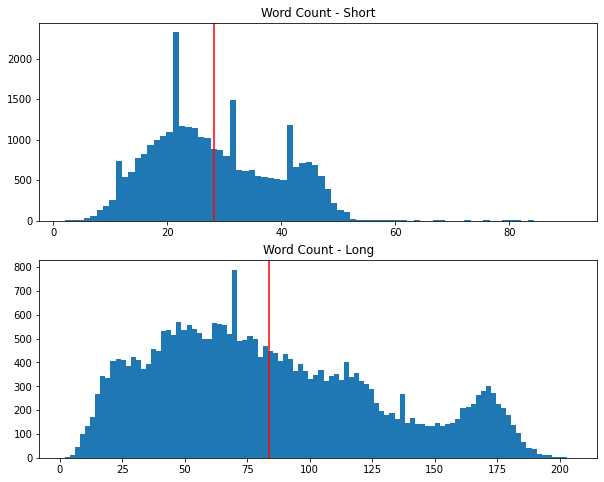

28.21306837094734
83.76675986951601


In [11]:
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.title('Word Count - Short')
plt.hist(my_df['word_count_short'], bins=80)
plt.axvline(my_df['word_count_short'].mean(), c='red', label='Mean')

plt.subplot(212)
plt.title('Word Count - Long')
plt.hist(my_df['word_count_long'], bins=100)
plt.axvline(my_df['word_count_long'].mean(), c='red', label='Mean')
plt.show()

print(my_df['word_count_short'].mean())
print(my_df['word_count_long'].mean())

It is clear by looking at the means that `plot_long` is about 3 times as long as `plot_short`. Also, the 'longest' short plot is still around 80 characters. I wonder if any of the short counts are longer than the long one.

In [12]:
my_df[ my_df['word_count_long'] < my_df['word_count_short'] ]

,tconst,title,release_year,release_date,runtime,plot_short,plot_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,word_count_short,word_count_long
31,tt0013075,Dr. Jack,1922,26 November 1922,60,"Country Doctor, Jack Jackson is called in to t...","Country Doctor, Jack Jackson is called in to t...",7.1,1159,18.0,7.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,39
91,tt0016690,Brown of Harvard,1926,2 May 1926,85,"Tom Brown shows up at Harvard, confident and a...","Tom Brown shows up at Harvard, confident and a...",6.2,1387,11.0,3.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,47,36
96,tt0018455,Sunrise: A Song of Two Humans,1927,4 November 1927,94,An allegorical tale about a man fighting the g...,"In this fable-morality subtitled ""A Song of Tw...",8.1,44852,241.0,181.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,32,31
341,tt0024252,Liebelei,1933,27 February 1936,88,Vienna in the beginning of the twentieth centu...,Vienna in the beginning of the twentieth centu...,7.5,1242,11.0,15.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,43,42
486,tt0027407,Bullets or Ballots,1936,6 June 1936,82,After Police Captain Dan McLaren becomes polic...,After Police Captain Dan McLaren becomes polic...,7.1,2455,32.0,15.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,43,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29372,tt5696326,Running for Grace,2018,7 September 2018,110,A timeless tale that takes place against the b...,A timeless tale that takes place against the b...,6.1,1120,45.0,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,45,39
29418,tt7534314,Niet Schieten,2018,10 October 2018,139,"In one fell swoop, nine-year old David Van de ...","In one fell swoop, nine-year old David Van de ...",7.7,1038,6.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46,45
29760,tt7493370,Adults in the Room,2019,3 October 2019,124,Greece in 2015: the economy is in tatters and ...,Provides an extraordinary account of low cunni...,5.8,3642,41.0,22.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,37
29980,tt9352780,Cold Case Hammarskjöld,2019,7 February 2019,128,Danish director Mads Brügger and Swedish priva...,Danish director Mads Brügger and Swedish priva...,7.6,1421,17.0,64.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40,39


There are only a few rows that have more words in the `word_count_short` rather than the `word_count_long`. However, these are only different by small number of words. I'm making the choice to go with `plot_long` and drop the other text fields.

In [13]:
my_df = my_df.drop(['title','plot_short', 'word_count_short'], axis=1)

---

Not all entries in `release_date` are complete - some are missing the day. I can still feature engineer the month from the `release_date` column.

In [14]:
%%time
for i in my_df.index:
    if 'jan' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 1
    elif 'feb' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 2
    elif 'mar' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 3
    elif 'apr' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 4
    elif 'may' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 5
    elif 'jun' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 6
    elif 'jul' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 7
    elif 'aug' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 8
    elif 'sep' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 9
    elif 'oct' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 10
    elif 'nov' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 11
    elif 'dec' in my_df.loc[i,'release_date'].lower():
        my_df.loc[i,'release_month'] = 12
    else:
        my_df.loc[i,'release_month'] = 0
    print(i,end='\r')
my_df = my_df.astype({'release_month': 'int64'})

Wall time: 16.6 s


We now have a new column: `release_month`.

---

Finally, I want a list of columns so I can rearrange them (and have `release_month` beside `release_year` for example).

In [15]:
cols = list(my_df.columns.values)

In [16]:
print(cols)

['tconst', 'release_year', 'release_date', 'runtime', 'plot_long', 'imdb_rating', 'num_imdb_votes', 'num_user_reviews', 'num_critic_reviews', 'action', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'history', 'horror', 'music', 'musical', 'mystery', 'romance', 'sci-fi', 'sport', 'thriller', 'war', 'western', 'word_count_long', 'release_month']


In [17]:
# New order for the columns
new_cols = [
 'tconst',
 'release_year',
 'release_month',
 'release_date',
 'runtime',
 'word_count_long',
 'imdb_rating',
 'num_imdb_votes',
 'num_user_reviews',
 'num_critic_reviews',
 'action',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci-fi',
 'sport',
 'thriller',
 'war',
 'western',
 'plot_long'
 ]

Drop last non-numeric columns and reorder remaining columns so plot is at the end.

In [18]:
clean_df = my_df[new_cols].copy()
clean_df = clean_df.drop(['tconst','release_date'], axis=1)
clean_df = clean_df.reset_index(drop=True)
clean_df.head(1)

,release_year,release_month,runtime,word_count_long,imdb_rating,num_imdb_votes,num_user_reviews,num_critic_reviews,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,plot_long
0,1920,2,67,170,8.1,52815,222.0,156.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,"Francis, a young man, recalls in his memory th..."


In [19]:
clean_df.dtypes

release_year            int64
release_month           int64
runtime                 int64
word_count_long         int64
imdb_rating           float64
num_imdb_votes          int64
num_user_reviews      float64
num_critic_reviews    float64
action                  int64
adventure               int64
animation               int64
biography               int64
comedy                  int64
crime                   int64
documentary             int64
drama                   int64
family                  int64
fantasy                 int64
film-noir               int64
history                 int64
horror                  int64
music                   int64
musical                 int64
mystery                 int64
romance                 int64
sci-fi                  int64
sport                   int64
thriller                int64
war                     int64
western                 int64
plot_long              object
dtype: object

This is the final set of features before NLP. They are all numeric with the exception of `plot_long`.

---

The data is now ready to be preprocessed for NLP. Export the dataframe for later use.

In [20]:
import csv
clean_df.to_csv('clean_df.tsv', sep='\t', quoting=csv.QUOTE_ALL)